# Handwritten Digit Recognition

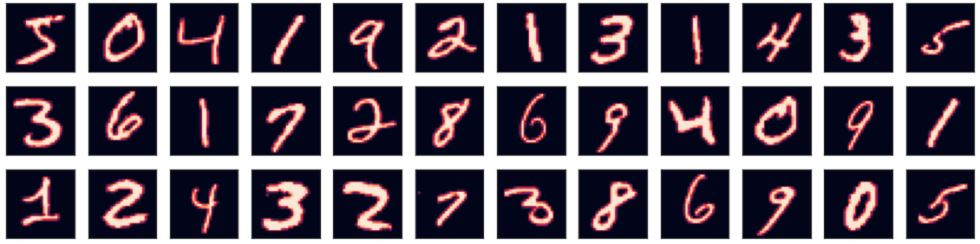

## Problem Statement :
> The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

## Dataset : 
> The MNIST dataset : This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

## Evaluation Metrics : 
> Accuracy, Precision, Recall, F1-Score :

## Imoprt Libraries

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
%load_ext tensorboard
#tensorboard_callback = tf.keras.callbacks.TensorBoard("myLogs")

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.utils import plot_model
from keras.applications.xception import Xception
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Network visualization
'''
pip install pydot, pip install pydotplus, pip install graphviz
'''
from keras.utils.vis_utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
print("Libraries Imported")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Libraries Imported


# Step1 :  Load the data

### => From Kaggle to Colab  
> [See this article](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

### => In Kaggle

In [3]:
# unzip the dataset
from zipfile import ZipFile
tn = ZipFile('../input/dogs-vs-cats/train.zip')
tn.extractall('/kaggle/working/') # save files in selected folder
tn.close()
print("Train Data Loaded")

tt = ZipFile('../input/dogs-vs-cats/test1.zip')
tt.extractall('/kaggle/working/') # save files in selected folder
tt.close()
print("Test Data Loaded")

FileNotFoundError: [Errno 2] No such file or directory: '../input/dogs-vs-cats/train.zip'

### => Set File Path

In [ ]:
train_file_path = "/kaggle/working/train"
test_file_path = "/kaggle/working/test1"

train_filenames = os.listdir(train_file_path)
test_filenames = os.listdir(test_file_path)

### => From Library or Package

In [4]:
from tensorflow.keras.datasets import mnist
# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
print (x_train.shape)

(60000, 28, 28)


# Step2 :  Explore dataset

**See same image shape**

In [5]:
for i in range(5):
    random_num = np.random.randint(0,len(x_train))
    print(x_train[random_num].shape)


(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


> Every image in this dataset have the same shape

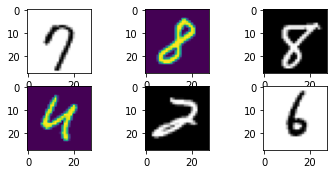

In [6]:
# importing matplotlib
# You'll need to run this twice as matplotlib doesn't generate the plot in the same cell where it was imported
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('binary'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])#, cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])#, cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('binary'))

# Display out plots
plt.show()

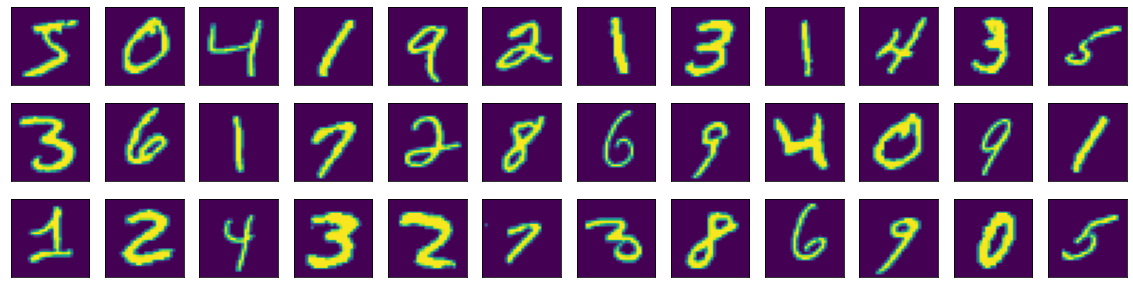

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [8]:
# show pixel values
print(f"Image pxel value : \n\n{x_train[100]} \n\n")
print(f"Image label related : {y_train[100]}")

Image pxel value : 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  

**Class Distribution**

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


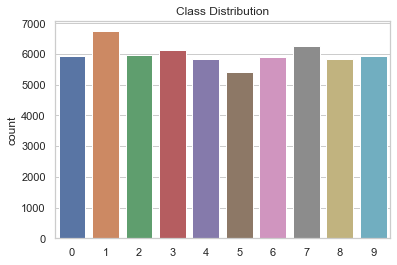

In [9]:
import seaborn as sns
pd.Series(y_train)
sns.set(style='white', context='notebook', palette='Paired')
sns.set_theme(style="whitegrid")
plt.figure()
sns.countplot(y_train).set(title='Class Distribution')
plt.savefig("output/cl_balance_bar.png")
#pd.DataFrame(y_train.value_counts()).T

> Number of image in each class is very close

In [10]:
print(f"Training Set => X_train : {x_train.shape}; y_train : {y_train.shape}")
print(f"Testing Set  => X_test  : {x_test.shape};  y_test  : {y_test.shape}")

Training Set => X_train : (60000, 28, 28); y_train : (60000,)
Testing Set  => X_test  : (10000, 28, 28);  y_test  : (10000,)


# Step3 : Preprocess data

In [11]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_train = np.array(x_train).reshape(-1, img_rows, img_rows, 1)
#x_test = np.array(x_test).reshape(-1, img_rows, img_rows, 1)


# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

print(f"Training samples Size : {x_train.shape[0]} Images")
print(f"Testing samples  : {x_test.shape[0]}  Images")
print("***"*15)

print(f"Training samples Shape : {x_train.shape}")
print(f"Testing samples Shape  : {x_test.shape}")



Training samples Size : 60000 Images
Testing samples  : 10000  Images
*********************************************
Training samples Shape : (60000, 28, 28, 1)
Testing samples Shape  : (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes         : " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
print ("Number of Pixel per image : " + str(num_pixels))
#print (f"Sammple Class hot encode  : {y_train[0]}" )


Number of Classes         : 10
Number of Pixel per image : 784


**3.1. Define Constants**

In [15]:
fast_run = False
img_width=28
img_height=28
img_size=(img_width, img_height)
img_channel=1
batch_size=32
epochs= 10
num_classes = 10

# Step4 : Build and Train the Model

In [16]:
# initializing the CNN
model = Sequential()

# Input layer, Convolution layer-1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(img_width, img_height, img_channel)))


# Convolution layer-2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# flattening layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax')) # 2 because we have cat and dog classes


## => Model Architecture

In [17]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [20]:
tf.keras.utils.plot_model(model, to_file='output/model_plot1.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## => Model Compilation

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

## => Callback Functions
callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. For more about callback function click [Here](https://keras.io/api/callbacks/) or [Here](https://www.kdnuggets.com/2019/08/keras-callbacks-explained-three-minutes.html)

In [25]:
# EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True)

# ModelCheckPoint

'''
This callback saves the model after every epoch.The model'll save in a 
particular location with minimun 'val_loss'.
'''
checkPoint = ModelCheckpoint(filepath="model/cd_model.h5",
                             monitor='val_acc',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

# ReduceLROnPlateau
'''
It reduces learning rate when a metric has stopped improving. 
'''
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# TBoard = tf.keras.callbacks.TensorBoard(log_dir='./logs')

callbacks = [earlystop , checkPoint, learning_rate_reduction]

#### tensorboard_callback

In [26]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
tensorboard_callback = [tensorboard_callback]

## => Calculate Training Duration

In [27]:
# this code is to show how much time required to train the model using different algorithms
from datetime import datetime
def timer(start_time= None):
  if not start_time:
    start_time=datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec=divmod(temp_sec,60)
    print('\n Time taken: %i hours %i minutes and %s seconds. '% (thour,tmin,round(tsec,2)))

## => Model Training

In [28]:
start_time=timer(None)
epochs=3 if fast_run else 10  
classifier = model.fit(x_train,  y_train, 
                       epochs=epochs,
                       batch_size=batch_size, 
                       validation_data=(x_test, y_test), 
                       verbose=1,
                       callbacks=callbacks
)
timer(start_time)

Epoch 1/10
1875/1875 [==============================] - 125s 55ms/step - loss: 0.2725 - accuracy: 0.9173 - val_loss: 0.0415 - val_accuracy: 0.9862
Epoch 2/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0750 - accuracy: 0.9776 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0589 - accuracy: 0.9828 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0520 - accuracy: 0.9852 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0419 - accuracy: 0.9879 - val_loss: 0.0341 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0389 - accuracy: 0.9884 - val_loss: 0.0445 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0384 - accuracy: 0.9885 - val_loss: 0

#### Time taken: 6 hours 52 minutes and 2.91 seconds. 

# Step5 : Model Evalution

### ==> Visualize training accuracy and loss

In [29]:
# list all data in history
print(classifier.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


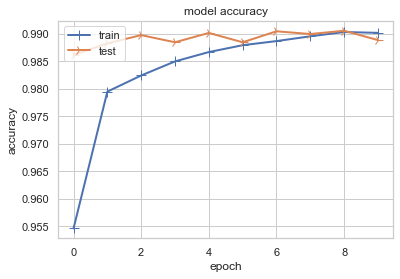

In [31]:
# summarize history for accuracy
line1=plt.plot(classifier.history['accuracy'])
line2=plt.plot(classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("output/model_accuracy.png")
plt.show()

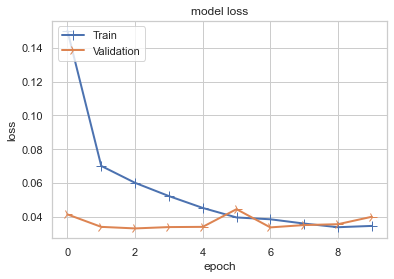

In [32]:
# summarize history for loss
line1=plt.plot(classifier.history['loss'])
line2=plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("output/model_loss.png")
plt.show()

### ==> Training, Validation  Accuracy and Generalization Error

In [33]:
print("Evaluation on training set")
print("============================")
score_train = model.evaluate(x_train, y_train,  verbose=0)
print('Train loss         :', score_train[0])
print('Train accuracy     : %.2f%% ' % round(score_train[1]*100,2),'\n')

print("Evaluation on testing set")
print("============================")
score_test = model.evaluate(x_test, y_test,  verbose=0)
print('Test loss           :', score_test[0])
print('Test accuracy       : %.2f%% '% round(score_test[1]*100,2), '\n')
print("Generalization Error")

print("============================")
print("Generalization Error: %.2f%%" % (100-score_test[1]*100))


Evaluation on training set
Train loss         : 0.021523592993617058
Train accuracy     : 99.36%  

Evaluation on testing set
Test loss           : 0.0331665575504303
Test accuracy       : 98.98%  

Generalization Error
Generalization Error: 1.02%


# Step6 : Prediction
### Run inference on new data

**6.1. Prepare Testing Data**

# create a dataframe and store all image files
test_filenames = os.listdir(test_file_path)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
test_df.head()

**6.2. Create Testing Generator**

In [66]:
x_test, y_test = x_test, y_test

**6.3. Find Prediction**

In [47]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
pred_max =  np.argmax(pred, axis=-1)
true_pred = pd.DataFrame({"True":test_max, "Predicted":pred_max})
true_pred = pd.DataFrame({"True":test_max, "Predicted":pred_max})

print("Test score accuracy is:","{:.2f}%".format(accuracy_score(y_test, pred.round())*100))

Test score accuracy is: 98.91%


**6.4. Visualize Result**

<AxesSubplot:>

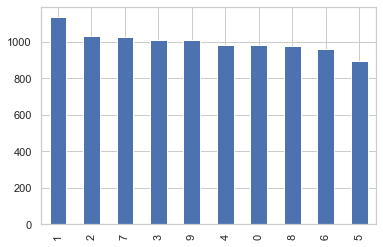

In [55]:
# see how many images classify into which class 
true_pred['True'].value_counts().plot.bar()

<AxesSubplot:>

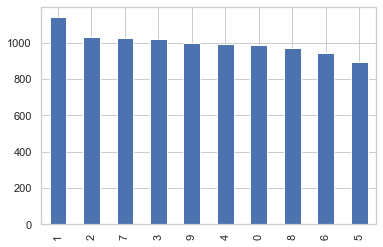

In [56]:
true_pred['Predicted'].value_counts().plot.bar()

In [61]:
true_pred['Predicted'].value_counts()
pd.DataFrame({"True_N":true_pred['True'].value_counts(), "Predicted_N":true_pred['Predicted'].value_counts()}).T

,1,2,7,3,9,4,0,8,6,5
True_N,1135,1032,1028,1010,1009,982,980,974,958,892
Predicted_N,1141,1033,1026,1018,996,990,985,971,945,895


**6.5.  See Predicted Image With Images**

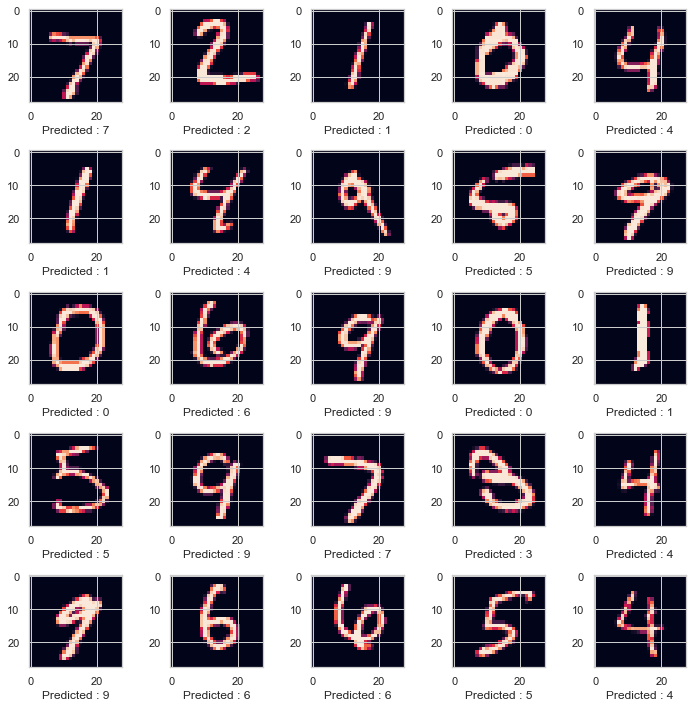

In [62]:
rows = 5
cols = 5

plt.figure(figsize=(10,10))
for index in range(rows*cols):
    img = x_test[index].reshape(1, 28, 28, 1)
    pred = np.argmax(model.predict(img))
    plt.subplot(rows, cols, index+1)
    plt.imshow(x_test[index][:,:,0])
    plt.xlabel('Predicted : {}'.format(pred))

plt.tight_layout()
plt.show()

**6.6. Confusion Matrix**

In [63]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

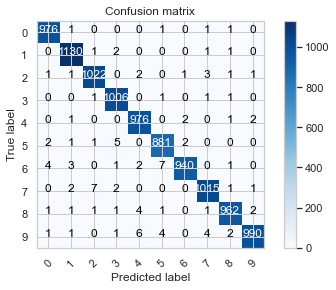

In [64]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

**6.7. Classification Report**

In [67]:
print(classification_report(y_test, pred.round()))

TypeError: Singleton array 4 cannot be considered a valid collection.

**6.8 Calculating Sensitivity and Specificity**

In [ ]:
"""
def pred_eval(cm):
    TP, FP, FN, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    total = sum(sum(cm))
    accuracy    = (TP+TN)/total
    
    precision   = TP/(TP + FP)
    recall      = TP/(TP + FN)
    sensitivity = TP/(TP + FP)
    specificity = TN/(TN + FN)
    f1 = 2*precision*recall/(precision + recall)
    eval = pd.DataFrame({"Metric":["Accuracy","Precision", "Recall", "Sensitivity", "Specificity", "F1" ],
                 "Score":[accuracy,precision, recall, sensitivity, specificity, f1 ]})
    return eval
    
metrics = pred_eval(confusion_mtx)
metrics.T    
"""

**6.8. Infer on single image**

Enter Image Index : 120
Predicted Digit :  5


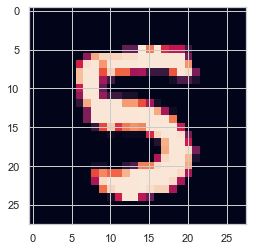

In [68]:
def pred_img(img_index=0):
    """
    Enter image and visualize corresponding image with it label
    """
    idx = int(input('Enter Image Index : '))
    g = plt.imshow(x_test[idx][:,:,0])
    # predict results
    # select the indix with the maximum probability
    results = np.argmax(model.predict(x_test[[idx]]))
    return print("Predicted Digit : ",results)
pred_img()    

## Step7 : Save the model

In [69]:
model.save('models/handwritten_digit_classify.h5')
print("Saving the model as handwritten_digit_classify.h5")

Saving the model as handwritten_digit_classify.h5


In [ ]:
rom keras.models import load_model
new_model = load_model('models/handwritten_digit_classify.h5')

# Step8 : Improve the model

A few things could be done to improve the results:

+ Different model architecture (num of nodes, etc)
+ Dropout
+ Adaptive learning rate
+ Data Augmentation
+ and more

# Step9 : Model Deployment

* With opencv
* Tkinter
* Flask
* Streamlit

# Kaggle Submission

In [ ]:
results =[]
for index in range(28000):
    img = test_data[index].reshape(1, 28, 28, 1)
    pred = np.argmax(model.predict(img))
    results.append(pred)

In [ ]:
submission = pd.DataFrame()
submission['ImageId'] = [i for i in range(1, 28001)]
submission['Label'] = results

In [ ]:
submission.to_csv('./my_submission.csv', index=False)

credit : https://www.kaggle.com/sidharth178/cat-dog-classification-flask-app